## Project Objective
Statistical Analysis of Business Data. Explore the dataset and extract insights from the data.

Key Questions to answer:
1.	Explore the dataset and extract insights using Exploratory Data Analysis.
2.	Prove(or disprove) that the medical claims made by the people who smoke is greater than those who don't?
3.	Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
4.	Is the proportion of smokers significantly different across different regions?
5.	Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.


## Assumptions
The Health Insurance Customer's data is a simple random sample from the population data.

# <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;">Contents:

- <a href = #link1> 1.1 Import the libraries  </a>
- <a href = #link2> 1.2 Load dataset and check shape and variables  </a>
- <a href = #link3> 1.3 Check Statistical summary for all the datasets  </a>
- <a href = #link4> 1.4 Data Pre Processing  </a>
- <a href = #link5> 1.5 EDA  </a>
- <a href = #link6> 1.6 Prove(or disprove) that the medical claims made by the people who smoke is greater than those who don't?    </a>
- <a href = #link7> 1.7 Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.  </a>
- <a href = #link8> 1.8 Is the proportion of smokers significantly different across different regions?  </a>
- <a href = #link9> 1.9 Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.  </a>

<a id = "link1"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.1 Import the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder


<a id = "link2"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.2 Load dataset and check shape and variables

In [2]:
df=pd.read_csv('AxisInsurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Check data shape

In [4]:
print("Rows X column:",df.shape)

Rows X column: (1338, 7)


##### Check data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<a id = "link3"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.3 Check Statistical summary for all the datasets

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


* Very few people have more than 2 children.75% people have 2 or less than 2 children
* Charges is highly skewed which suggest that majority of the people need the basic medical care. Onley few of them suffer from diseases which cost them extra


<a id = "link4"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.4 Data Pre processing

##### Fix data types

In [7]:
df['sex']=df['sex'].astype('category')
df['smoker']=df['smoker'].astype('category')
df['region']=df['region'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


##### Check missing values

In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<a id = "link5"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.5 EDA

## Univariate analysis

In [10]:
# Lets have common code for box plot and histogram
def histogram_boxplot(feature,figsize=(15,10),font_scale=2,bins=None):
    f2,(ax_box2,ax_hist2)=plt.subplots(nrows=2,
                                      sharex=True,
                                      gridspec_kw={"height_ratios":(0.25,0.75)},
                                      figsize=figsize,
                                      )
    sns.set(font_scale=font_scale)
    sns.boxplot(feature,ax=ax_box2,showmeans=True,color='violet')
    sns.distplot(feature,kde=False,ax=ax_hist2,bins=bins,palette='winter')if bins else sns.distplot(feature,kde=False,ax=ax_hist2)
    ax_hist2.axvline(np.mean(feature),color='green',linestyle='--')
    ax_hist2.axvline(np.median(feature),color='black',linestyle='-')
    print("Mean:",np.mean(feature),"\nMedian:",np.median(feature))

### Observations on Age

Mean: 39.20702541106129 
Median: 39.0


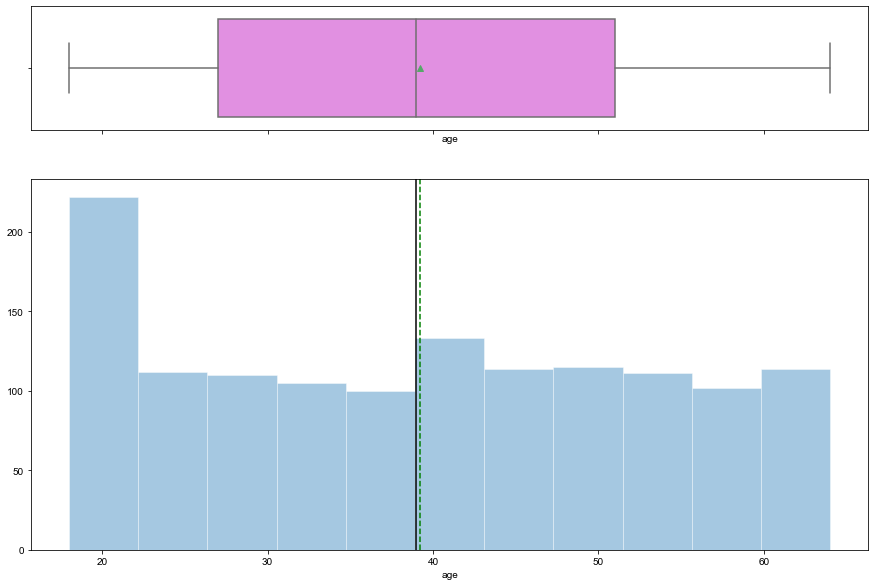

In [11]:
histogram_boxplot(df['age'])

* Age is uniformaly distributed with both mean and median are close to 39.

### Observations on BMI

Mean: 30.663396860986538 
Median: 30.4


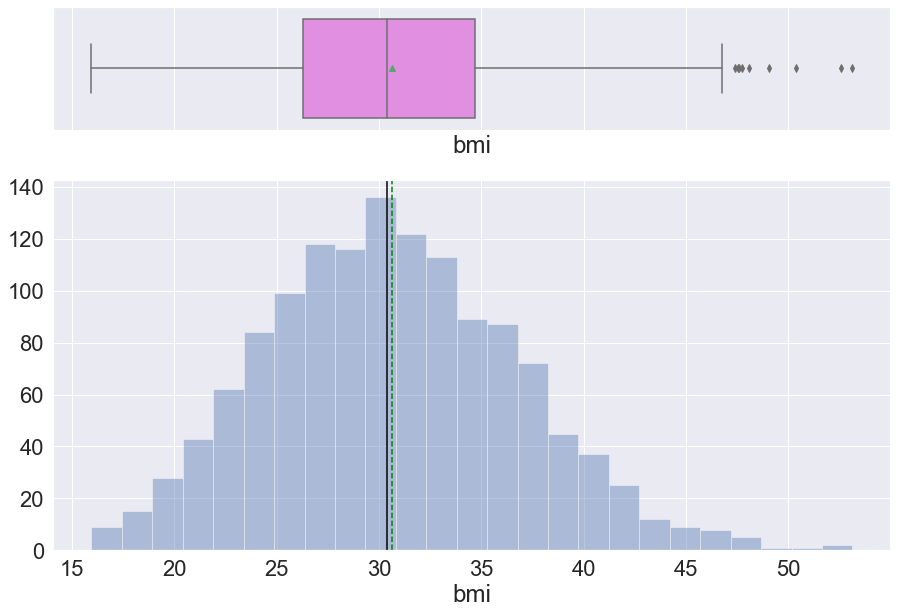

In [12]:
histogram_boxplot(df['bmi'])

* BMI is close to normally distributed with some outliers.

### Observations on Children

Mean: 1.0949177877429 
Median: 1.0


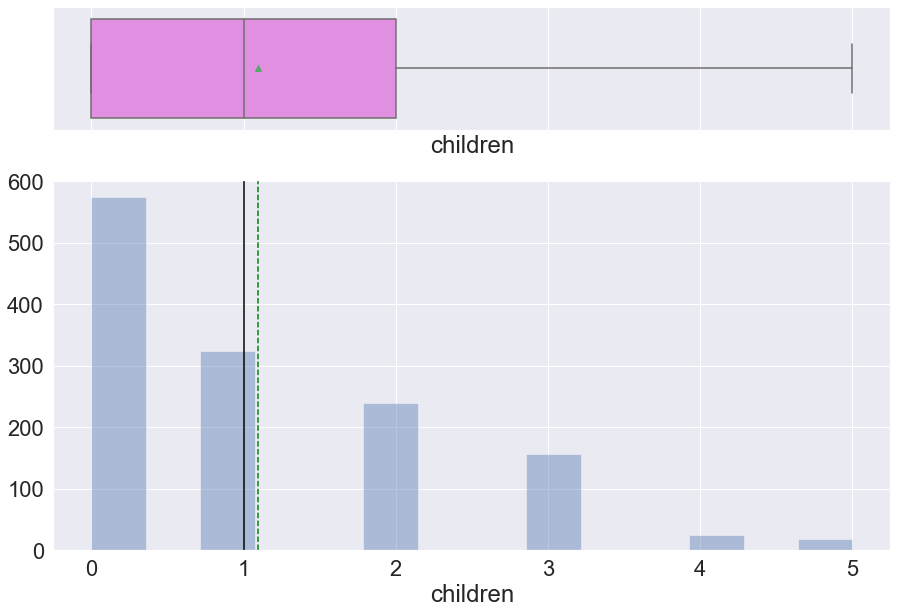

In [13]:
histogram_boxplot(df['children'])

* Children is left skewed.


### Change children to category

In [14]:
df['children']=df['children'].astype('category')

### Observations on charges

Mean: 13270.422265141257 
Median: 9382.033


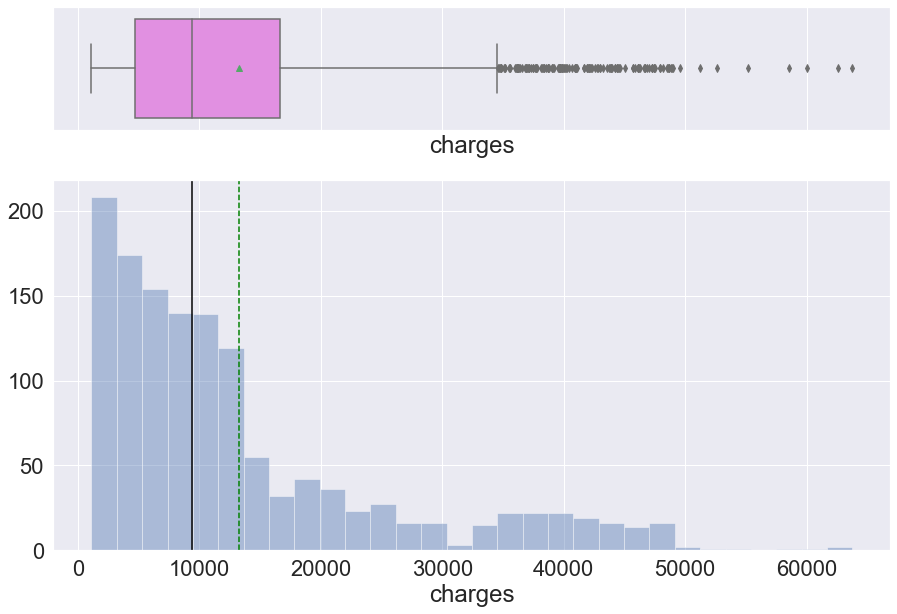

In [15]:
histogram_boxplot(df['charges'])

* This variable has many outliers.
* Charges are highly skewed.

In [16]:
stats.skew(df.charges)

1.5141797118745743

### Bar plot to see the percentage distribution of each feature

In [17]:
def bar_prc(plot,feature):
    total=len(feature)
    for p in ax.patches:
        percentage='{:.1f}%'.format(100 * p.get_height()/total)
        x=p.get_x() + p.get_width()/2 -0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage,(x,y),size=15)
    plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   category
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 37.3 KB


### Observations on sex

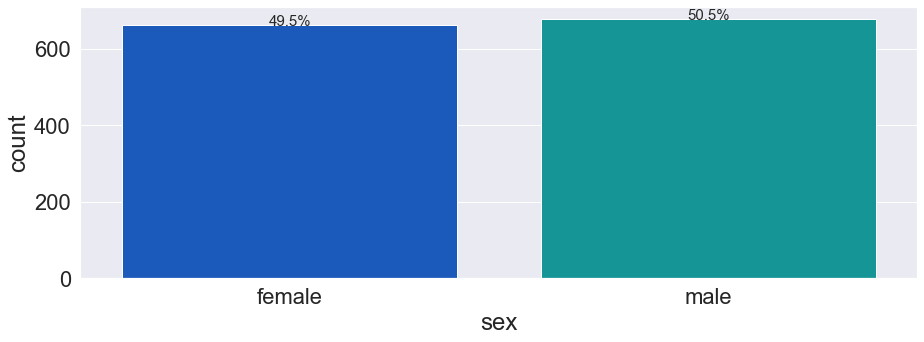

In [19]:
plt.figure(figsize=(15,5))
ax=sns.countplot(df['sex'],palette='winter')
bar_prc(ax,df['sex'])

* Insurance distribution among the male and female is very uniform

### Observations on children

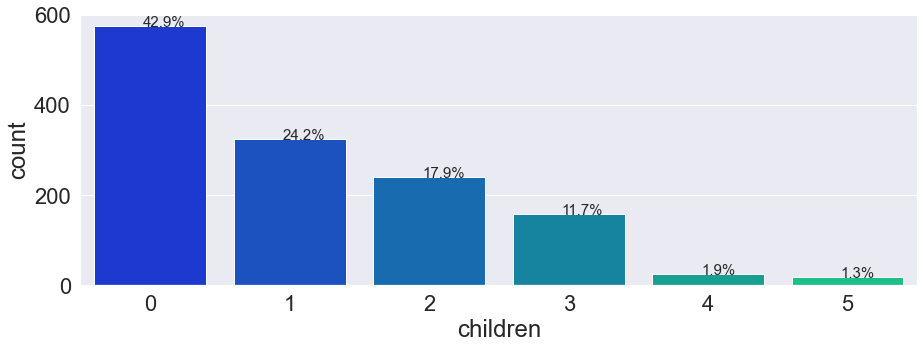

In [20]:
plt.figure(figsize=(15,5))
ax=sns.countplot(df['children'],palette='winter')
bar_prc(ax,df['children'])

* 42% insurance holder does not have children
* Nearly 42% insurance holder have 1 or 2 children


### Observations on smoker

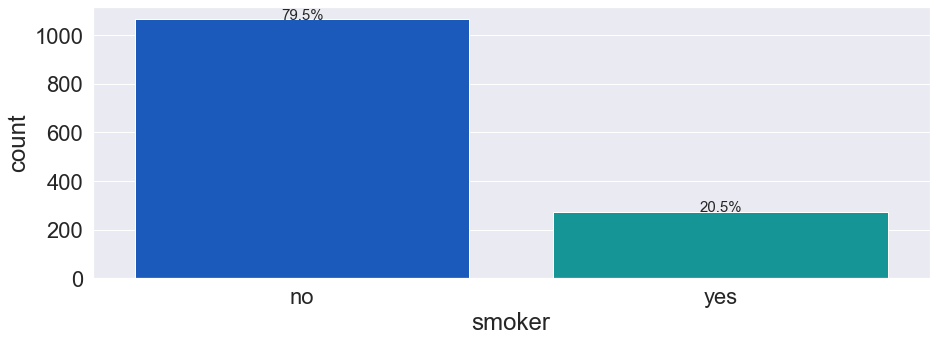

In [21]:
plt.figure(figsize=(15,5))
ax=sns.countplot(df['smoker'],palette='winter')
bar_prc(ax,df['smoker'])

* 80% of insurance holders are non-smoker
* Only 20% insurance holders are smoker. Further analysis need to be done to see the claims by smoker customer.


### Observations on region

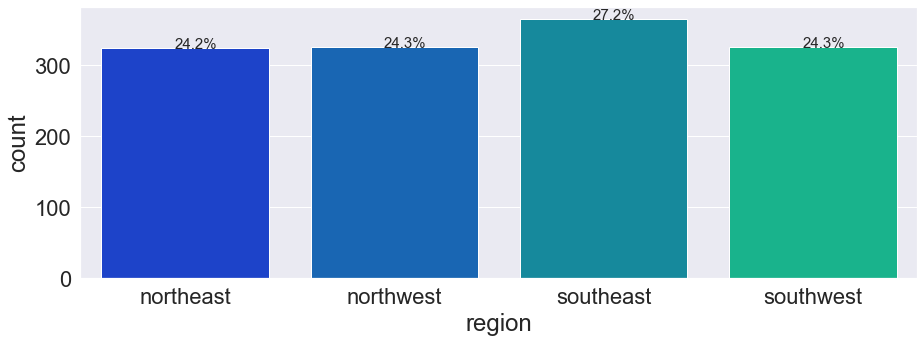

In [22]:
plt.figure(figsize=(15,5))
ax=sns.countplot(df['region'],palette='winter')
bar_prc(ax,df['region'])

* Insurance distribution across the region is uniform except for southeast which is 3% more compared to others.

## Bivariate Analysis

#### Correlation and heat Map

In [23]:
df.corr()

,age,bmi,charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
charges,0.299008,0.198341,1.000000


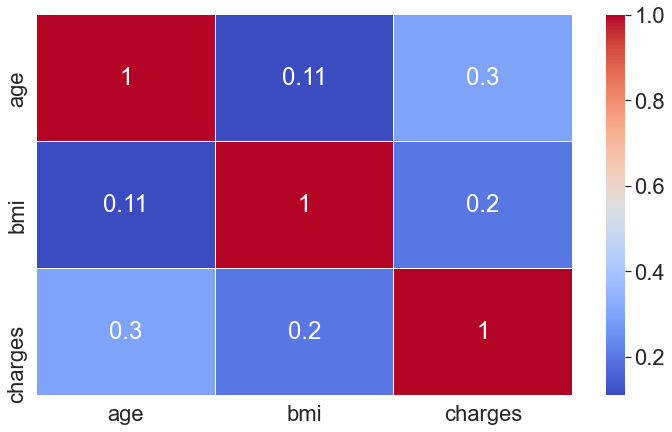

In [24]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.02,cmap='coolwarm')
plt.show()

* All the variables are positively correlated with each other.
* Correlation between variables is not very high.


### pairplot

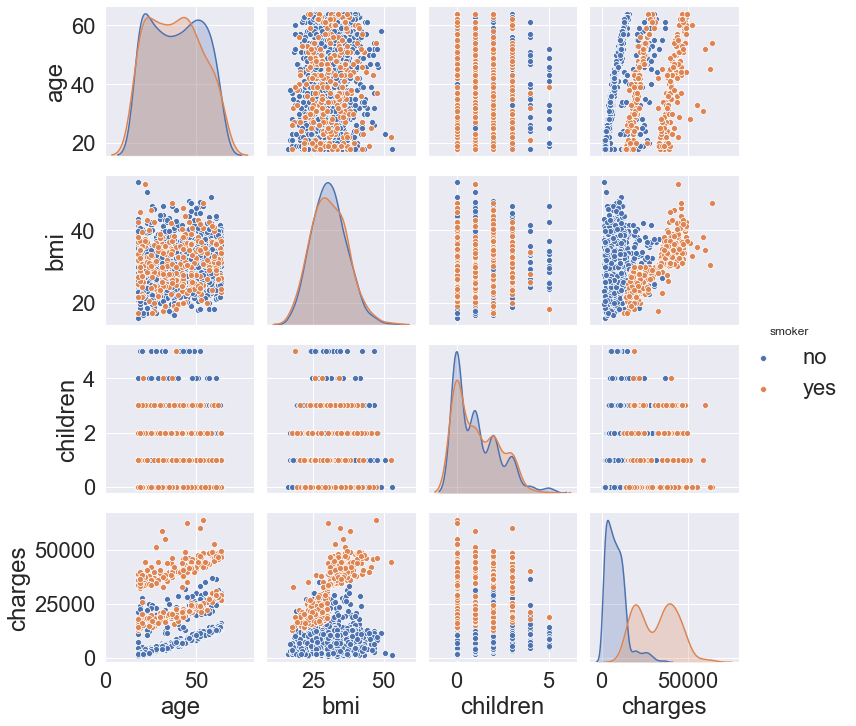

In [25]:
sns.pairplot(df,hue='smoker')
plt.show()

* There is linear pattern between charges and age. The charges by older people are more.
* There is clear difference between smoker and no smoker charges.


<a id = "link6"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.6 Prove(or disprove) that the medical claims made by the people who smoke is greater than those who don't?

In [41]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [42]:
pd.crosstab(df['sex'],df['smoker'],margins=True)

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


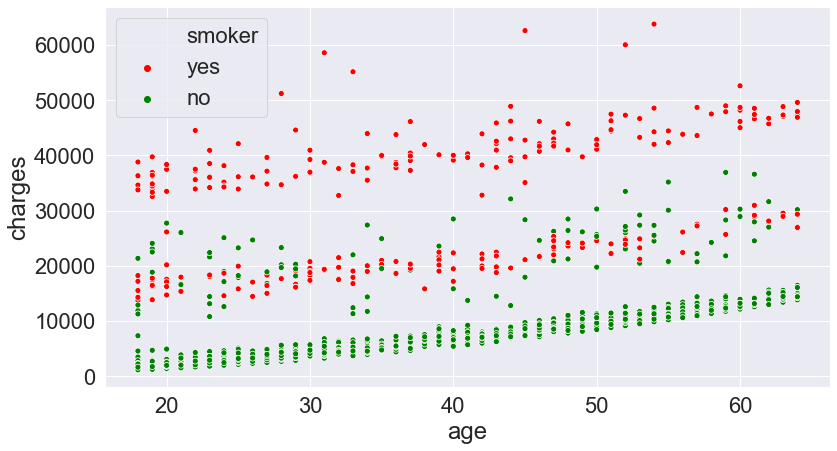

In [34]:
plt.figure(figsize=(13,7))
sns.scatterplot(df.age,df.charges,hue=df.smoker,palette=['red','green'])
plt.show()

* Visually the charges by smoker are more than the non-smoker.
* We have to perform t-test to verify if the mean charges by smoker is greater than non-smoker.



### T-test to check dependency of charges on smoking attribute


In [12]:
# Null Hypothesis   
# Significance Level = 0.05
Ho = "Mean charges of smokers is less than or equal to non-smokers"
# Alternate hypothesi  
Ha = "Mean charges of smokers is greater than non-smokers"
 
#selecting charges values for smoker 
x = np.array(df[df['smoker'] == 'yes']['charges'])

#selecting charges values for non-smoker 
y = np.array(df[df['smoker'] == 'no']['charges'])

# perform an independent T-test

t_statistic, p_value = stats.ttest_ind(x,y)
p_value=p_value/2  # Since this is one tailed test
print(t_statistic, p_value)
if p_value <0.05:
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

46.664921172723716 4.1357179210886093e-283
Mean charges of smokers is greater than non-smokers as the p_value (4.1357179210886093e-283) < 0.05


<a id = "link7"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.7 Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

In [13]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

#### MEAN BMI

In [16]:
print("Male_Mean_BMI:",np.mean(df[df.sex=='male']).bmi)
print("Female_Mean_BMI:",np.mean(df[df.sex=='female']).bmi)

Male_Mean_BMI: 30.943128698224832
Female_Mean_BMI: 30.377749244713023


* male mean BMI is slightly greater than the female BMI

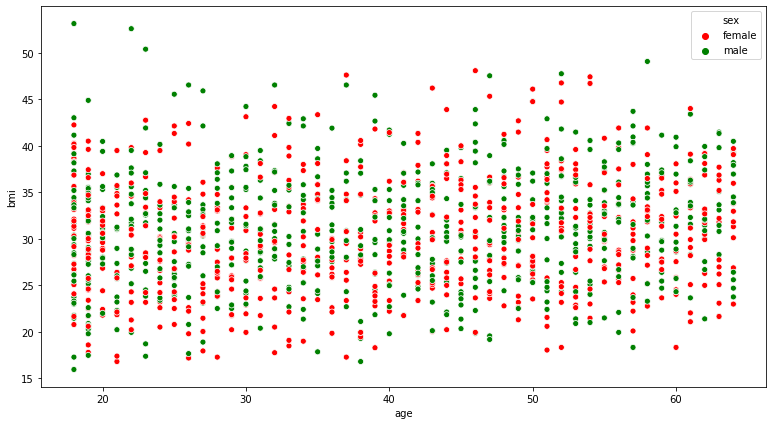

In [18]:
plt.figure(figsize=(13,7))
sns.scatterplot(df.age,df.bmi,hue=df.sex,palette=['red','green'])
plt.show()

* Visually we can not see any relationship between gender and BMI

### T-test to check dependency of BMI on Gender attribute


In [19]:
# Null Hypothesis   
# Significance Level = 0.05
Ho = " BMI of feamle is same as male"
# Alternate hypothesi  
Ha = "BMI of feamle is different than male"
 
#selecting bmi values for male 
x = np.array(df[df['sex'] == 'male']['bmi'])

#selecting bmi values for female
y = np.array(df[df['sex'] == 'female']['bmi'])

# perform an independent T-test

t_statistic, p_value = stats.ttest_ind(x,y)
  # This is two tailed test
print(t_statistic, p_value)
if p_value <0.05:
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

1.696752635752224 0.08997637178984932
 BMI of feamle is same as male as the p_value (0.08997637178984932) > 0.05


<a id = "link8"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.8 Is the proportion of smokers significantly different across different regions?

In [25]:
pd.crosstab(df['smoker'],df['region'])

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


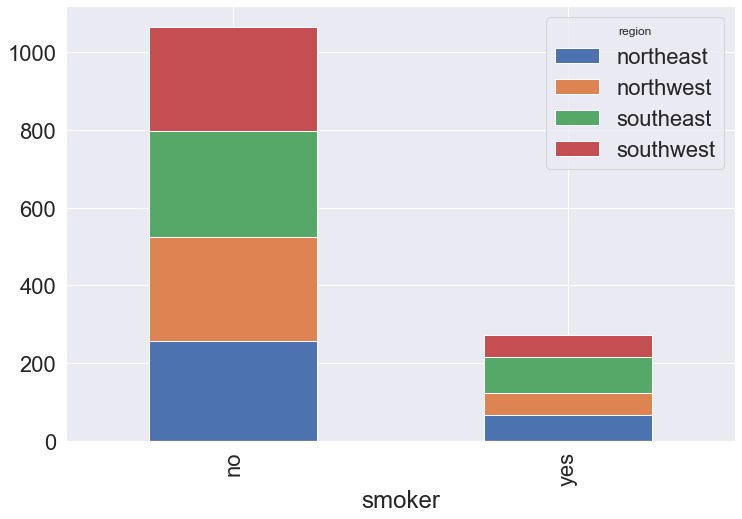

In [26]:
pd.crosstab(df['smoker'],df['region']).plot(kind="bar",figsize=(12,8),stacked=True);


* Number of smokers is slightly higher in southeast region.

### Chi-sq test to check if smoking habits are different for different regions

* Chi-Square test is done to determine whether or not there is a significant association between two categorical variables
*  it tells us whether two variables are independent of one another



In [29]:
# Chi-square test
Ho="Region has no effect on smoking habits"
Ha="Region has an effect on smoking"
# contigency table
crosstab=pd.crosstab(df['region'],df['smoker'])

chi,p_value,dof,expeted=stats.chi2_contingency(crosstab)
if p_value<0.05:
    print(f'{Ha} as p values is ({p_value.round(3)})<0.05')
else:
    print(f'{Ho} as p value is ({p_value.round(3)})>0.05')

Region has no effect on smoking habits as p value is (0.062)>0.05


<a id = "link9"></a> 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#3D59AB;">1.9 Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.

In [30]:
df_female=df[df['sex']=='female']

In [33]:
df_female.groupby(['children'])['bmi'].mean()

children
0    30.361522
1    30.052658
2    30.649790
3    30.436429
4    31.943182
5    30.620625
Name: bmi, dtype: float64

* The mean bmi of women with 0,1 & 2 children are very similar

## Aanalysis of variance test (ANOVA) to check if bmi values for females having different number of children, are significantly different


In [36]:
Ho="Number of children has no impact on bmi"
Ha="Number of children has impact on bmi"

child_0=df_female[df_female.children==0]['bmi']
child_1=df_female[df_female.children==1]['bmi']
child_2=df_female[df_female.children==2]['bmi']

f_stat,p_value=stats.f_oneway(child_0,child_1,child_2)

if p_value<0.05:
    print(f'{Ha} as p value is ({p_value.round(3)})<0.05')
else:
    print(f'{Ho} as p value is ({p_value.round(3)})>0.05')

Number of children has no impact on bmi as p value is (0.716)>0.05


## Conclusion

* Very few people have more than 2 children.75% people have 2 or less than 2 children.
* Insurance distribution among the male and female is very uniform.
* Mean charges of smokers is greater than non-smokers so compamy should make seprate policy for the customer under smoker category.